### Starting with concat, clean and explore of DS found with 4.5M recods from 2010 (US)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import regex
import html
from collections import Counter

In [2]:
pd.set_option('display.max_colwidth', 1500)

In [3]:
# See first line to decide how to tackle the DS
file_path = '../X_stuff/5M_Cheng-Caverlee-Lee_2010/training_set_tweets.txt'

with open(file_path, 'r') as file:
    first_five_lines = [next(file) for _ in range(5)]

first_five_lines

['60730027\t6320951896\t@thediscovietnam coo.  thanks. just dropped you a line.\t2009-12-03 18:41:07\n',
 "60730027\t6320673258\t@thediscovietnam shit it ain't lettin me DM you back, what's your email?\t2009-12-03 18:31:01\n",
 '60730027\t6319871652\t@thediscovietnam hey cody, quick question...can you dm me?\t2009-12-03 18:01:51\n',
 '60730027\t6318151501\t@smokinvinyl dang.  you need anything?  I got some left over meds!\t2009-12-03 17:00:16\n',
 "60730027\t6317932721\tmaybe i'm late in the game on this one, but this lowender vst is making my apt rumble!\t2009-12-03 16:52:36\n"]

In [4]:
# Try first a mini df sample 
mini_df = pd.read_csv(file_path, delimiter='\t', usecols=[2], nrows=10)
mini_df

,@thediscovietnam coo. thanks. just dropped you a line.
0,"@thediscovietnam shit it ain't lettin me DM you back, what's your email?"
1,"@thediscovietnam hey cody, quick question...can you dm me?"
2,@smokinvinyl dang. you need anything? I got some left over meds!
3,"maybe i'm late in the game on this one, but this lowender vst is making my apt rumble!"
4,i really hope A.I. makes the most of this second chance in philly. i'm glad he's goin home.
5,@smokinvinyl danny boy! wanna check out d-nice at the afex 1 year tonight? we could pre-game at mine and walk over.
6,"...and if you have ppl that you care about, make sure to let them know. life is too short to lose friends over bullshit. peace and love."
7,...that shit weighs heavy on me. take responsibility for your life. I don't blame anyone for where I am in this world...
8,"...including his last failed relationship. and while I know that none of it is grounded in reality, and I actually am worried about him..."
9,so...I got a string of texts last night from someone I haven't heard from in a long time blaming me for everything wrong with his life...


In [5]:
# Goint on the full df
df = pd.read_csv(file_path, delimiter='\t', usecols=[2], names=['text'])
df.head()

,text
0,@thediscovietnam coo. thanks. just dropped you a line.
1,"@thediscovietnam shit it ain't lettin me DM you back, what's your email?"
2,"@thediscovietnam hey cody, quick question...can you dm me?"
3,@smokinvinyl dang. you need anything? I got some left over meds!
4,"maybe i'm late in the game on this one, but this lowender vst is making my apt rumble!"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3811264 entries, 0 to 3811263
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   text    object
dtypes: object(1)
memory usage: 29.1+ MB


In [7]:
# Try to iterate on the DF few times to get impression 
random_five_rows = df.sample(n=5)
random_five_rows

,text
1940251,"are you trying to win that $50,000 or a escalade on www.2myparty.com"
3262005,@audioconnell Are there more #voicetalents than lawyers now? Ha!
2857858,"Health Tip: ""It's all about the blood"" Cardio, Green foods, drinking water, etc. These all make your blood go...YEA!!"
2961831,"More I use Evernote, I think it's one of most innovative & underrated apps ever. More to come in a post. (via @steverubel) - i love it too"
1434746,True originality consists not in a new manner but in a new vision. - Edith Wharton http://tqpage.com/37845


In [8]:
# nulls
df.isnull().sum()

text    80807
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3730457 entries, 0 to 3811262
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   text    object
dtypes: object(1)
memory usage: 56.9+ MB


In [11]:
# Duplicates ?
df.duplicated().sum()

119065

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
# Shorter than 5 characters
short_texts = df[df['text'].str.len() < 4]
len(short_texts)

939

In [14]:
random_five_rows = short_texts.sample(n=5)
random_five_rows

,text
3386330,Oh!
319139,wwe
1653812,:o)
78739,!
3286714,Ok!


In [15]:
# No use to chcek spelling and grammer for 3 characters (from the look of it)
df = df[df['text'].str.len() >= 4]

In [16]:
# Long texts 
long_texts = df[df['text'].str.len() > 160]
len(long_texts)

936

In [17]:
random_five_rows = long_texts.sample(n=5)
random_five_rows

,text
3103062,"Women facing poverty, oppression, and violence are usually viewed as victims. Nicholas Kristof and Sheryl WuDunn’s... http://bit.ly/txbY1\t2009-09-18 19:05:21\r\n41463973\t4156030622\tBill Gates, Sr. gives Kristof's book a rave review! http://bit.ly/dWitK. Get a ticket for 10/15, get a free copy! http://bit.ly/35p0Ft\t2009-09-21 16:30:54\r\n41463973\t4156109288\tBill Gates, Sr. gives Kristof's book a rave review!... http://bit.ly/2Vp82L\t2009-09-21 16:34:35\r\n41463973\t4156868254\tDid you know: When you sign up for An Evening with Kristof, you get a free copy of his book! Sign up right now! http://bit.ly/10p1dp\t2009-09-21 17:10:28\r\n41463973\t4159216222\tCome to YPIN: Networking Night with special guests, Young European Leaders"" Wednesday, September 30 from 5:00 pm... http://bit.ly/imdww"
1116090,"What matters is not how often you are right, but how large your cumulative errors are.” The Black Swan by Nassim Nicholas Taleb.\t2009-06-07 21:51:58\r\n18531704\t2071737653\tRT@PARKPLACEMTG Whatever your mind can conceive and can believe, it can achieve. Napoleon Hill"
986226,"‘There is no terror in a bang only in the anticipation of it.’ ~ Alfred Hitchcock\t2009-11-15 12:15:53\r\n14986811\t5740408137\t@MovieDriver - hey, thanks for the blogroll link :)\t2009-11-15 11:14:24\r\n14986811\t5698064047\tI steal from every movie ever made."" ~ Quentin Tarantino"
287043,"Fashion’s fade, style is eternal.” – Yves St. Laurent - www.HAUTESTREET.com\t2009-11-12 21:53:32\r\n57815830\t5670080552\tHope everyone had an AMAZING day today!!!!! Haute Street Inc. did!!! <3\t2009-11-12 21:49:07\r\n57815830\t5668315738\tFashion’s fade, style is eternal.” – Yves St. Laurent"
1839316,"Is it inappropriate or against the AV TOU to post information one has learned about another Av'er th... http://tinyurl.com/yhz37oe\t2009-11-04 17:00:14\r\n20268420\t5431650969\tWhat Is Your All Time Favorite Music Group, and Why? http://bit.ly/3aW1pj\t2009-11-04 16:00:08\r\n20268420\t5430181100\tHow do I use multiple AMEX gift cards on a new order which costs more than the amount of all the gift cards... http://bit.ly/1K35x4\t2009-11-04 15:00:13\r\n20268420\t5404373420\tOkay, let's try this again! I messed up the joke. Here goes: http://bit.ly/3QL6Eb\t2009-11-03 17:00:09\r\n20268420\t5402913875\tWhich side of a CD or DVD is it safe to write on with a magic marker, the side with the writing or the blan... http://bit.ly/1E1Tcs\t2009-11-03 16:00:08\r\n20268420\t5401479648\tHow to create or acquire an ASIN http://bit.ly/AnZo2\t2009-11-03 15:00:12\r\n20268420\t5375580395\tDee is sending a message to BosM. http://bit.ly/A0jR4\t2009-11-02 17:00:12\r\n20268420\t5374141512\tI'm an actor looking to get into the industry. What are the steps that I need to take to get there? http://bit.ly/3YyboT\t2009-11-02 16:00:08\r\n20268420\t5372740507\tWhere do I get the product info when selling groceries on Amazon? Do I have to enter it? http://bit.ly/3N4pST\t2009-11-02 15:00:13\r\n20268420\t5348484932\tInspirational Words of Wisdom......November 1 http://bit.ly/2rcGhc\t2009-11-01 17:00:10\r\n20268420\t5347235742\tAnyone have any idea of country song with some lyrics, I've been waiting for ..."


In [18]:
# Too long texts 
too_long_texts = df[df['text'].str.len() > 500]
len(too_long_texts)

506

In [19]:
random_five_rows = too_long_texts.sample(n=5)
random_five_rows

,text
2997156,"The idea that we need to be the leader is a colonial thought. We need to put that aside and be learners.” Dr. Yborolla #ats\t2009-09-17 13:09:00\r\n15753922\t4060866791\t@exchangedliving @chaddbrooks @mahfrot @jinnthedrummerwhomaynottweetbutisawesomenonetheless you all did sound great! love Jin's user FYI\t2009-09-17 14:09:00\r\n15753922\t4061024732\t@jeremiahaja hey bro, what time does the small group meeting start tonight?\t2009-09-17 14:09:00\r\n15753922\t4068805723\tRT @MereMawBrooks: If I can't scuba, then what has all this been for?"""
2824559,"Search Twitter and Google simultaneously! http://ow.ly/9uyt #twoogle #search #twitter #google\t2009-05-27 18:49:47\r\n16536621\t1858576297\tCould RSS Protect You from a RIF? http://ow.ly/7XCK\t2009-05-20 07:25:07\r\n16536621\t1851878749\tJob Outlook 09, Grads, majors in demand? http://ow.ly/7UeQ #jobs #grads #hiring #demand\t2009-05-19 16:32:05\r\n77201112\t6100556828\t@Inayah @hoodbooty69 goody goody\t2009-11-26 20:46:13\r\n77201112\t6100554652\t@hoodbooty69 goody goody\t2009-11-26 20:46:07\r\n77201112\t6100394147\t@hoodbooty69 #4 look like thanxgivin dinner wit all dat meat u can hav leftovas\t2009-11-26 20:39:18\r\n77201112\t6100360429\t@denire men don't dance 2 beyonce tell em 2 stop..................LOL\t2009-11-26 20:37:49\r\n77201112\t6100333691\t@cherokeedassxxx ABC\t2009-11-26 20:36:41\r\n77201112\t6100282438\t@BarackObarbiie i think it's cute\t2009-11-26 20:34:31\r\n77201112\t6100250014\t@Thick1017 i think i gain sum in fingers i'm takin 4 ever 2 type cuz i'm hittin 2 3 at sametime everytime\t2009-11-26 20:33:08\r\n77201112\t6100133652\t@Inayah will do\t2009-11-26 20:28:24\r\n77201112\t6100022304\t@hoodbooty69 #3 can get smashed all day\t2009-11-26 20:23:51\r\n77201112\t6100001310\t@hollyheartxxx wut da hell is a kangaroo mouse\t2009-11-26 20:23:00\r\n77201112\t6099964834\t@Thick1017 well then go 2 huggebear.ning.com and listen 2 me get rid of da confusion\t2009-11-26 20:21:28\r\n77201112\t6099934229\t@Diamond913 hate 2 c how u talk bout ppl u hate\t2009-11-26 ..."
2434096,"living in the ghetto just to study kings and humanism” , @EatTheCakeNYC #behappy http://hiphop.bandcamp.com\t2009-09-27 00:51:17\r\n17412326\t4403366812\t#behappy http://hiphop.bandcamp.com\t2009-09-26 17:23:34\r\n17412326\t4401994323\tRT @Jenniferalyse: # FF bmore hip hop @wordsmithmusic @etothemjor @rosettas @bmoreoriginal @the41yo @tislamthegreat @djimpulse @djminusnine\t2009-09-26 16:08:09\r\n17412326\t4374587300\tpoor as Edgar Allen, a beggar looking over my shoulder because I know the story of Medgar Evers"", @EatTheCakeNYC http://bit.ly/289pme"
304948,Will men devolve into some type of androgynous creature that can appear either male or female so as to placate the... http://bit.ly/cMEsZ\t2009-10-20 16:29:50\r\n22033957\t5020976101\tJim Sedlak on Planned Parenthood's clinical trials on underage girls - Be aware - fight Planned Parenthood:...\t2009-10-20 10:35:24\r\n22033957\t5018967784\tHey I think Jill Stanek likes our pumpkin idea! Thanks Jill! http://bit.ly/fl6NF\t2009-10-20 08:52:30\r\n22033957\t5000636205\tOne more fan will put us at 700! Will it be you? http://bit.ly/KQ9dG\t2009-10-19 16:11:47\r\n22033957\t4999479004\tHalloween Activism Idea - Pro-Life Pumpkins- Spread the message of\r\nlife on October 31st by making pro-life... http://bit.ly/H7D9w\t2009-10-19 15:18:12\r\n22033957\t4991058737\t@mercyhouseorg @nomorechange @StMichaelSword - thanks for spreading word about Personhood in Michigan! http://all.org/article.php?id=12267\t2009-10-19 08:40:33\r\n22033957\t4991017906\tMadrid's pro-life demonstration shocked the world this weekend. The tide is turning for pro-abortion forces in the ... http://bit.ly/HtVHw\t2009-10-19 08:38:24\r\n22033957\t4966070572\t23 Michigan state legislators introduce Personhood Amendment to MI state constitution http://all.org/article.php?id=12267\t2009-10-18 08:26:48\r\n78525990\t5673132797\t@ReallyIsSimple RT Carrie Prejean has a book?? Serious

In [20]:
# longest ?
lengths = df['text'].str.len()
index_of_longest = lengths.idxmax()
longest_text = df.loc[index_of_longest, 'text']
len(longest_text)

31135

In [21]:
# Let's keep it short and focused on the public limitation of 280
df = df[df['text'].str.len() < 280]

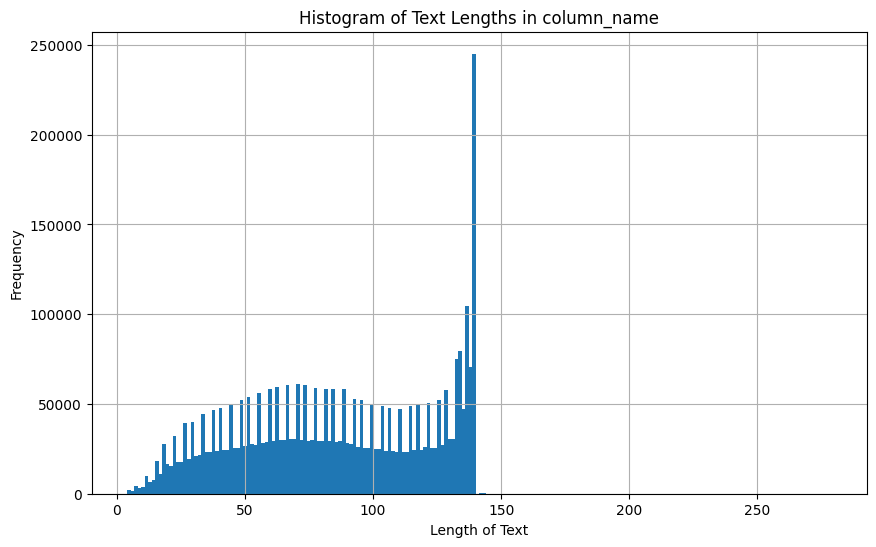

In [22]:
# Length Histogram
lengths = df['text'].str.len()
plt.figure(figsize=(10, 6))
lengths.hist(bins=200)
plt.title('Histogram of Text Lengths in column_name')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

In [23]:
# The most frequent length?
length_frequencies = lengths.value_counts()
length_frequencies.idxmax()

140

In [24]:
# Long texts 
long_texts = df[df['text'].str.len() > 200]
len(long_texts)

136

In [25]:
# Now looking again on the text
random_five_rows = df.sample(n=5)
random_five_rows

,text
2497161,Yoga For a Healthy Heart: http://tinyurl.com/yjqvrco #HEALTH #YOGA
3013984,http://twitpic.com/hirz0 - One of my favorite Keri Oldham watercolors.
1150000,"Meet Me, NYC, Nov. 5th: On November 5th, I'll be speaking at the Apple Store SoHo in New York City. I'll be spe.. http://bit.ly/M54bm"
3645332,"RT @mariannestclair: Tweet-A-Thon Wed&Thurs 10AM-10PM Goal $50K @DanielleHerb to impact 1,000,000 ADD/ADHD/Autistic kids http://bit.ly/x1pnD"
456327,"@lakecreature What a fitting name for you! RT @startribune ""Minne"" to prowl Chain of Lakes http://bit.ly/3foEs"


In [26]:
# Tweeter symbols and keywords exploration
retweets = df[df['text'].str.startswith('RT ')]
len(retweets)

220105

In [27]:
retweets.head()

,text
82,RT @Pampelmoose: @Educast_Media or the free Rumble at Mississippi Studios tonight. http://bit.ly/raar4 sounds like a great show too!
89,"RT @tweetmeme Students Build Hydrogen Vehicle That Gets 1,336 MPG : Gas 2.0 http://bit.ly/tH6wi"
114,RT @ggrosseck: [presentation] Is Your University Ready For the Ne(x)t-Generation? http://tinyurl.com/nazcqd #edmedia
238,"RT @reubenrail: Plant With Purpose is the same as Floresta, it is allowing us to reach far more people with the work we do!"
359,"RT @fernandoandgreg: Fernando and Greg are back on the radio at MOVIN' 99.7 beginning Thursday, Nov. 12! Listen online at www.movin997.com"


In [28]:
# will remove 'RT ' later

In [29]:
direct_message = df[df['text'].str.contains('DM')]
len(direct_message)

12823

In [30]:
direct_message

,text
1,"@thediscovietnam shit it ain't lettin me DM you back, what's your email?"
185,"Looking for Local Cleveland Artists for the Cafe-new Art coming in September,DM Artefino with information and pls ReTweet to your artfriends"
190,@CoutureInvito - it is consignment ! DM me for info on how to make the trek out to Medina to see your work
194,"@virtuallori - thanks for Following Lori! We are looking to host a Cleveland handmade event in the Fall/Holidays, pls DM me if interested!"
508,@jonibeal HAHA assuming that was supposed to be a DM to me?
...,...
3808924,"RT @BalboaPark Resident's Free Tuesday today! @SDMA @JapaneseGarden Museum of Man, Mingei & Art Inst. Free 4 SD Residents, Act Mil & fams"
3809083,"@moSODMG lol nigga I posted it on twitter twice, and it was at laces"
3809086,Game this Saturday at 9 @ Frederick Price high school @MichaellAnthony @moSODMG @dollArbeAu @JoshLaFlare @NajeeT @stokesUP @eveeyFASHO
3809337,RT @KeenaLA: @ElleBrianna Lmao @SantanaNicoleD is gonna DM u with instructions lol! ==> Yeahhhh!! Thanks =)


In [31]:
# no need to remove DM

In [32]:
# shortening to 140 (t.co)
tweets_with_shortened_links = df[df['text'].str.contains('t\.co', regex=True, case=False)]
len(tweets_with_shortened_links)

19536

In [33]:
tweets_with_shortened_links

,text
49,http://i986.photobucket.com/albums/ae347/ceaseanddesistcollection/photo2.jpg
880,just joined a video chat at http://tinychat.com/61dh0 Make your own video chat at http://tinychat.com #tinychat
905,just joined a video chat at http://tinychat.com/xxxratedafternoonshow Make your own video chat at http://tinychat.com #tinychat
906,just joined a video chat at http://tinychat.com/sweet_n_juici88 Make your own video chat at http://tinychat.com #tinychat
907,just joined a video chat at http://tinychat.com/freak_n_d_morning Make your own video chat at http://tinychat.com #tinychat
...,...
3809457,Great deal on Affordable Mineral Makeup ™. You save 10% & AMM donates 10% to cause of your choice too! http://innerbeautygirlz.blogspot.com/
3809538,RT @BleedblueKyGirl: RT @midlifechick: http://biggovernment.com/ Have you been here yet? #ACORN central. Share w/yr contacts. Get the wo ...
3810359,"hey guys, this is our weekly schedule http://schnitzelandthings.blogspot.com/ Please check it out. Hope to c u this week!!"
3810712,"www.peopleofwalmart.com proves that we should all question the health of our entire civilization. Seriously, check it out..."


In [34]:
# this is random ~t.com no need to touch

In [35]:
# Start looking on symbols
heart_emoji = '[❤️]'
tweets_with_heart = df[df['text'].str.contains(heart_emoji)]
len(tweets_with_heart)

27

In [36]:
tweets_with_heart

,text
2940221,"Well. 2 nights in a row I'm home after 4am. Switch party was all angels & demons. Gorgeous, talented angels & demons. G'nite dear twibe. ❤"
2950443,@justinsrecovery hope you have a great day ツ just wanted to send some ❤ your way sweetie
2963933,C'MON @twitter - help a tweeta out! i would ❤ 2 know #whatdoyouthink (◕‿◕)http://twitpic.com/ihpe2 Jets Pats #inmyhood NFL Patriots R Saints
2991263,@ijmackondeck your welcome . & loving it ! i can do about the same . just gotta do it more often . ❤ ☺
2991267,@souljaboytellem dre if you need any graphics made . i`m always here for you . that`s one of the reasons why i`m doing this . lol ❤
3064328,❤ moz
3066608,@carisamiklusak zaky misses his godmommy!! So do I!! We luv you! ❤
3164648,"@dragonheartsong Hope you're feeling better soon! We're sick here, too, for 1.5 weeks. I'll send you some Light today. ❤"
3236475,#i❤♫
3236476,MUSIC LOVERS RT #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫ #i❤♫


In [37]:
# More emoji - first try failed, skip to later
def contains_emoji(text):
    for character in text:
        return bool(regex.findall(r'\p{Emoji}', text))
emoji_tweets_mask = df['text'].apply(contains_emoji)
emoji_tweets_df = df[emoji_tweets_mask]
len(emoji_tweets_df)

KeyboardInterrupt: 

In [ ]:
emoji_tweets_df

,text
6,@smokinvinyl danny boy! wanna check out d-nice at the afex 1 year tonight? we could pre-game at mine and walk over.
13,SATURDAY NIGHT AT THE TAVERN: http://yfrog.com/4aka3cj
14,FRIDAY NIGHT AT THE GRIFFIN: http://yfrog.com/3glqzj
15,"tonight: we're up and runnin by 7:30, you're on faderz by 10 for $10. can't beat that wit a bat. http://yfrog.com/35tqhj"
20,Save the date for dec 29th @damfunk (full band live set) pase rock skeet skeet hosted by Daymeon! (via @THEMJEANS)--THATSA MASTER BLAZTER.
...,...
3811248,"I approve. He gets an 8. Intelligence would have gotten him a 9, a few more inches taller would be a 10. Tsk."
3811250,@street3 Taco taco taco. Burrito.
3811253,@Street3!
3811260,"oh god heroes tonight, ... http://lnk.ms/0ShgX"


In [ ]:
# HTML special characters

In [ ]:
# HTML-encoded text
def decode_html(text):
    return html.unescape(text)
df['clean_text'] = df['text'].apply(decode_html)

In [ ]:
df

,text,clean_text
0,@thediscovietnam coo. thanks. just dropped you a line.,@thediscovietnam coo. thanks. just dropped you a line.
1,"@thediscovietnam shit it ain't lettin me DM you back, what's your email?","@thediscovietnam shit it ain't lettin me DM you back, what's your email?"
2,"@thediscovietnam hey cody, quick question...can you dm me?","@thediscovietnam hey cody, quick question...can you dm me?"
3,@smokinvinyl dang. you need anything? I got some left over meds!,@smokinvinyl dang. you need anything? I got some left over meds!
4,"maybe i'm late in the game on this one, but this lowender vst is making my apt rumble!","maybe i'm late in the game on this one, but this lowender vst is making my apt rumble!"
...,...,...
3811258,what bees make milk?? boobees lol that's a knee slapper,what bees make milk?? boobees lol that's a knee slapper
3811259,boredd as tits.,boredd as tits.
3811260,"oh god heroes tonight, ... http://lnk.ms/0ShgX","oh god heroes tonight, ... http://lnk.ms/0ShgX"
3811261,tits i'm bored,tits i'm bored


In [ ]:
# More emoji 
def contains_emoji(text):
    return emoji.emoji_count(text) > 0 
emoji_tweets_mask = df['clean_text'].apply(contains_emoji)
emoji_tweets_df = df[emoji_tweets_mask]
len(emoji_tweets_df)

3599

In [ ]:
emoji_tweets_df

,text,clean_text
5746,He Said WHAT?! Obama Has Never Used Twitter | DISGRASIAN™ http://tinyurl.com/y9knba2,He Said WHAT?! Obama Has Never Used Twitter | DISGRASIAN™ http://tinyurl.com/y9knba2
6913,@CapnWiley Oh nice. Mine's a UNIVERSAL® remote.,@CapnWiley Oh nice. Mine's a UNIVERSAL® remote.
14009,"Cannery Casino Resorts Raises > $20,000 for Breast Cancer Research Foundation® for Breast Cancer Awareness Month. PR: http://bit.ly/43YU0u","Cannery Casino Resorts Raises > $20,000 for Breast Cancer Research Foundation® for Breast Cancer Awareness Month. PR: http://bit.ly/43YU0u"
15083,"RT @SandyMorris: ""We must not promise what we ought not, lest we be called on to perform what we cannot."" © Abraham Lincoln. .","RT @SandyMorris: ""We must not promise what we ought not, lest we be called on to perform what we cannot."" © Abraham Lincoln. ."
17379,Went to bed grindin. Woke up hustlin. © @industrygroup,Went to bed grindin. Woke up hustlin. © @industrygroup
...,...,...
3809794,@zfarha Wish you could join us!! Consider it a warm up for Pie Night II™ when you visit in Oct.,@zfarha Wish you could join us!! Consider it a warm up for Pie Night II™ when you visit in Oct.
3811037,Innovation Strong Despite Recession: Human Resource Executive® Magazine Receives Record Number of Ent.. http://bit.ly/19GzoX #tradeshow,Innovation Strong Despite Recession: Human Resource Executive® Magazine Receives Record Number of Ent.. http://bit.ly/19GzoX #tradeshow
3811045,TimeSight Systems™ Announces Next-Generation Platform for Intelligent Network Video Recorders w.. http://bit.ly/1Dkuwf #tradeshow,TimeSight Systems™ Announces Next-Generation Platform for Intelligent Network Video Recorders w.. http://bit.ly/1Dkuwf #tradeshow
3811046,TimeSight Systems™ Receives Lenel Factory Certification http://bit.ly/Hb4Z1 #tradeshow,TimeSight Systems™ Receives Lenel Factory Certification http://bit.ly/Hb4Z1 #tradeshow


In [ ]:
next(emoji.analyze('GVI Security Solutions to Introduce AutoIP™ VMS and Industry Leading Samsung Electronics 43X Zo.. http://bit.ly/GpUa6 #tradeshow'))

Token(chars='™', value=EmojiMatch(™, 42:43))

In [ ]:
random_five_rows = emoji_tweets_df.sample(n=5)
random_five_rows['clean_text']

1332533        President of Attorneysâ€™ Title Guaranty Fund Elected to Board of Governors at American Land Title Associ.. http://bit.ly/7CLPVG
2132451    @foryourlaw Check out ID Safe™ -- an all new proprietary document management system for handling medical records http://bit.ly/NfPf5
3247513                                                   watching A Cinderella Story :). Chad MM Yummy ;) This film gets me every time haha x♥
621987                    Call for Entries: RSA® Conference 2010 Innovation Sandbox  http://bizwire.pr/9dYSN #RSA #conference #tradeshow #event
545389                                                                        Dog Attacks Shark! « IN® Pet Supplement Blog http://bit.ly/6bjDiK
Name: clean_text, dtype: object

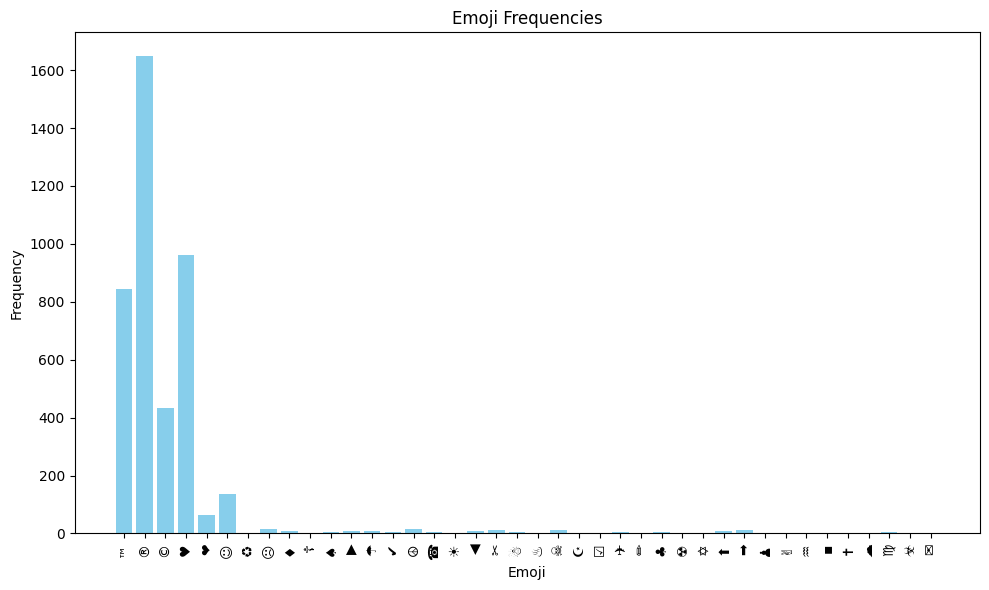

In [ ]:
# Nice to know what emojies we have
emoji_freq_counter = Counter()
for index, row in emoji_tweets_df.iterrows():
     result = list(emoji.analyze(row['clean_text']))
     for item in result:
          emoji_freq_counter.update(item.chars)

plt.figure(figsize=(10, 6))
plt.bar(emoji_freq_counter.keys(), emoji_freq_counter.values(), color='skyblue')
plt.xlabel('Emoji')
plt.ylabel('Frequency')
plt.title('Emoji Frequencies')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# This part is testing OpenAI API with many sentences and establish the right prompt to start a test
random_five_rows = df.sample(n=10)
msgs = random_five_rows['clean_text'].tolist()
for msg in msgs:
    print(msg)

Organically grown oranges have up to 30% more vitamin C than those grown conventionally -Neil Lavin #food #nutrition
Local youth from Tampa, FL-- Casero & Santiago are organizing a street team, for more info send us a comment or mes ... http://lnk.ms/33rst
No Droid For Me, #iPhone Is The PC Of Smartphones (@PCWorld) http://viigo.im/1pS1
@TeamXero that's good to hear - what about the discount for multiple organisations being cut from 50% to 25% ?
@Mister_Turtle Gotta love those Snuggies!
Shopping at Walmart...now I realize why they invented suicide.
Traffic sucks and there's a dog walking on the freeway...
RT @bikehugger visits @globebikes http://www.flickr.com/photos/huggerindustries/sets/72157622231411001/
@RozSheffield I think its about time you covered up then Rozzy :P x
Northwest Reverb: Charles Noble gives a glimpse into orchestra ... http://bit.ly/YERRj


In [ ]:
# Esablished a promt for GTPT-3.5 and i'm happy - moving to classify my ds

In [ ]:
df.to_csv('../data/clean_train_tweets.csv', index=True)

In [ ]:
# system promt: You are a sophisticated tool developed for scrutinizing Twitter messages. Your primary responsibility is to identify and correct spelling and grammar mistakes within these messages. Although Twitter is known for its informal language and slang, your objective includes distinguishing between acceptable informal expressions and actual spelling or grammatical inaccuracies. This means contractions should be used correctly (e.g., "I'm" instead of "im"), and verbs should be in their proper form (e.g., "making" instead of "makin"), even in the midst of slang or informal contexts. Your analysis should bypass the slang itself unless it directly leads to a spelling or grammatical mistake. Upon reviewing a message, respond with "yes" if it adheres to standard spelling and grammar rules, considering the nuances of Twitter's informal communication. If any errors are present, reply with "no" and concisely specify each error found, emphasizing solely the spelling and grammatical issues without critiquing the informal or slang usage, unless it constitutes an error in spelling or grammar.

In [ ]:
# continue to ds_classification folder